# 2 Decision Trees II

With this task, we want to explore how to program decision trees in Python. We will use some popular packages and libraries that are specifically developed for this machine learning method, but also manually design some of the functions needed to set up a decision tree classifier ourselves. 

Before you start working on this task, check out the [Decision Tree](https://scikit-learn.org/stable/modules/tree.html) module from the [Scikit-Learn](https://scikit-learn.org/stable/index.html) library and get familiar with some functions this module provides.

If you haven't installed the correct version of scikit-learn yet, just run the following line of code to properly install it on your machine.

In [40]:
!pip install scikit-learn==1.0.2

## 2.1 Obtaining the **Iris Plants** dataset
Let's use another interesting dataset this time: The [Iris Plants Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset) provided by scikit-learn is used to classify three different types of iris flower. Similar to the Diabetes dataset, this one is preprocessed and ready for analyzing.

In [41]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [42]:
iris = datasets.load_iris()

In [43]:
features = iris.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
classes = iris.target_names
classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

So as you can see, the class names are the Latin names for each type of iris flower. But let's continue by taking a look at the dataset description:

In [45]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 2.2 Automated Decision Tree Classification
We can now get the DecisionTreeClassifier and train it on our feature and target values.

In [46]:
from sklearn import tree
X, y = iris.data, iris.target
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dt = dt.fit(X, y)

Awesome, now it's time to plot our tree:

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.461538461538461

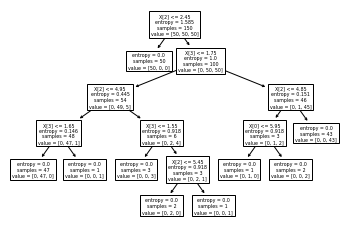

In [47]:
tree.plot_tree(dt)

This doesn't look too good. We need a bigger figure size and don't want to see this unreadable text. So let's use ```matplotlib``` to adjust the size of the plot and enter some parameters to the ```plot_tree()``` function:

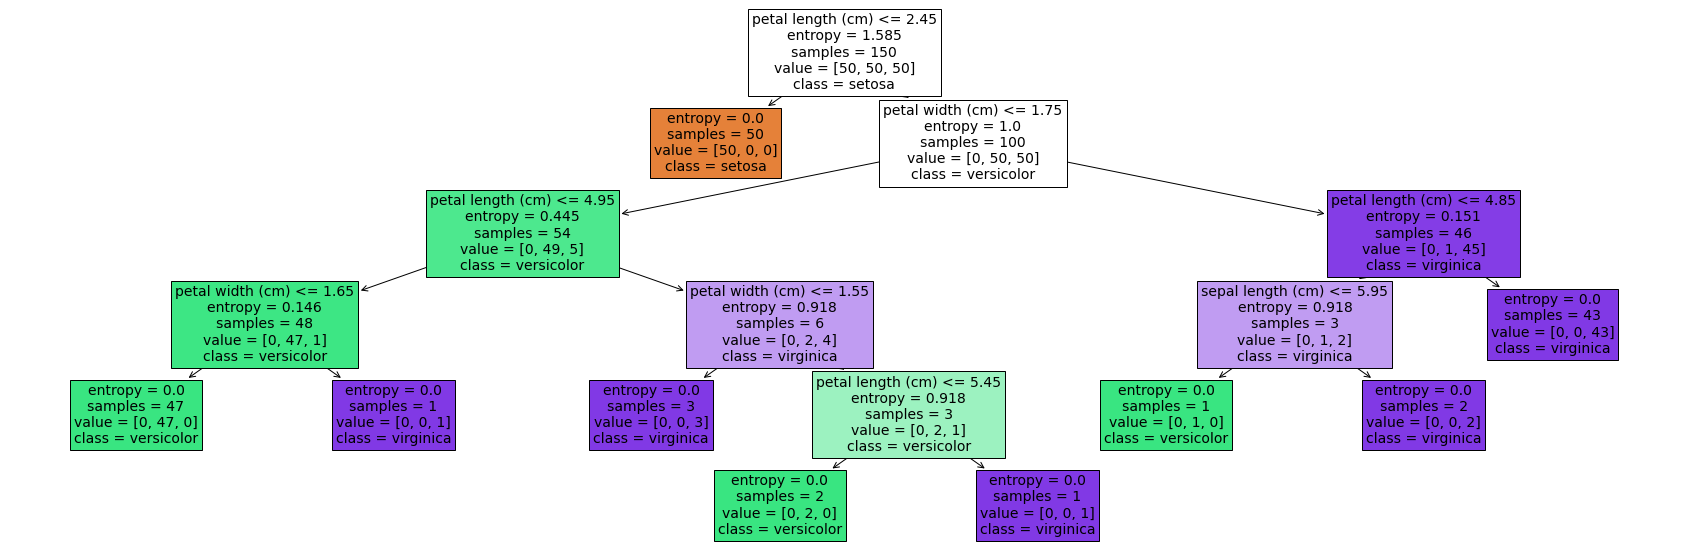

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
_ = tree.plot_tree(dt, feature_names=features, class_names=classes, filled=True, fontsize=14)

By the way ```filled=True``` as described in the ```plot_tree``` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) is responsible for coloring the decision tree according to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.

So now we know how to automatically create a decision tree using existing Python libraries. But since we still haven't taken a look behind the curtains of such automated functions, we want to write some decision tree classifier ourselves.

## 2.3 Attribute Splitting with ID3 Algorithm

In the lecture, you got to know two criteria for attribute split, i.e. information gain (entropy) and gini impurity. Now it's time to write some functions that determine the next attribute to split on according to the entropy criterion. **Your part will be to implement the four helper functions below**.

### Task 2.3.1 Calculate Entropy

The first function ```entropy(...)``` takes an array of values (usually labels) and outputs the entropy (or _info_).

In [49]:
def entropy(value_arr):

#     #Alterntive aproach:
#     #count unique values in value array
#     classes = []
#     for v in value_arr:
#         if v not in classes:
#             classes.append(v)
    
#     #calculate propability 
#     entropy = 0
#     for x in classes:
#         p = np.count_nonzero(value_arr == x)/len(value_arr)
#         entropy += p * math.log(p, 2)
#     entropy *= -1
    
#     return entropy

    entropy = 0
    classes, counts = np.unique(value_arr, return_counts=True)
    for i in range(len(classes)):
        entropy += ((counts[i]/len(value_arr)) * np.log2(counts[i]/len(value_arr)))
    return -entropy

### Task 2.3.2 Calculate Average Information 

The second function ```avg_info(...)``` takes an array of values of an attribute (that is usually an entire column in a dataset if each attribute represents one column) and an array of labels of the same length and outputs the average information of that attribute. This means, the function has to be invoked once for each attribute in a dataset.

In [50]:
def avg_info(attr_values, labels):
    #count unique values in attr_values
    partitions = np.unique(attr_values)
    
    #split label array into different partitions and sum up the average information
    avg_info = 0
    for p in partitions:
        dj = []
        for x in range(attr_values.size):
            if attr_values[x] == p:
                dj.append(labels[x])
        avg_info += (len(dj)/labels.size) * entropy(dj)
    
    return avg_info

### Task 2.3.3 Calculate Information Gain

Now that we have the overall entropy (as integer/float/...) and the average information of all attributes (as an array), the function ```info_gain(...)``` calculates the information gain of all attributes and returns the corresponding array. This means, we call this function once, not for all attributes separately.

In [51]:
def info_gain(info, attr_info):
    
    gain = []
    for attribute in attr_info:
        gain.append(info-attribute)
        
    return gain

### Task 2.3.4 Determine Split Attribute

Finally, in the function ```get_split_attr(...)``` determines the index position of the attribute that we should split on, based on all information gain values stored in an array. 

In [52]:
def get_split_attr(gain_arr):
    attr_pos = np.argmax(gain_arr)
    return attr_pos

Here's some code to test your functions (you don't have to change anything here). All steps are basically following the equations in slide 34 of the L07 slides. So try to understand what calculations have to be done there and this task will be a breeze. ;-)

In [53]:
#
# TEST CODE / MAIN FUNCTION
#


# Step 1: Calculate Information (Entropy)
info = entropy(iris.target)

# Step 2: Calculate Average Information of all Attributes
attr_info = [avg_info(attr, iris.target) for attr in iris.data.T]

# Step 3: Calculate Information Gain
gain = info_gain(info, attr_info)

# Step 4: Determine Split Attribute based on Information Gain
attr_pos = get_split_attr(gain)
attr_name = iris.feature_names[attr_pos]

# Step 5: Some fancy output for debugging
print('The next attribute to use for splitting is {}.'.format(attr_name))
print(info)

The next attribute to use for splitting is petal length (cm).
1.584962500721156


_Hint: Does the print-statement output the same attribute that has been split on in the decision tree above right in the root? That should be a good sign!_